#### EDA Switzerland Games

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('added_var.csv')

In [4]:
df

,Unnamed: 0,Player1_Name,Player1_Height,Player1_Weight,Player1_turned_pro,Player1_age,Player1_Rank,Player1_country,Tournament,Location,...,Player2_Weight,Player2_turned_pro,Player2_age,Player2_Rank,Player2_country,Rank_Diff,Height_Diff,Weight_diff,Turned_pro_diff,age_diff
0,0,Novak Djokovic,188,77.0,8.0,24.0,1,Serbia,Basel,"Basel, Switzerland",...,86.0,9.0,29.0,64,Poland,63,3,9.0,1.0,5.0
1,1,Novak Djokovic,188,77.0,8.0,24.0,1,Serbia,Basel,"Basel, Switzerland",...,83.0,13.0,31.0,47,Belgium,46,3,6.0,5.0,7.0
2,2,Novak Djokovic,188,77.0,7.0,23.0,3,Serbia,Basel,"Basel, Switzerland",...,86.0,4.0,24.0,32,Serbia,29,5,9.0,3.0,1.0
3,3,Novak Djokovic,188,77.0,7.0,23.0,3,Serbia,Basel,"Basel, Switzerland",...,71.0,5.0,23.0,66,Netherlands,63,3,6.0,2.0,0.0
4,4,Novak Djokovic,188,77.0,7.0,23.0,3,Serbia,Basel,"Basel, Switzerland",...,88.0,6.0,22.0,26,Latvia,23,3,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,4927,Juan Manuel Benitez Chavarriaga,184,79.0,1.0,21.0,646,Colombia,Switzerland F3,"Collonge-Bellerive, Switzerland",...,81.0,6.0,23.0,1011,Switzerland,365,4,2.0,5.0,2.0
4805,4928,Marvin Moeller,178,69.0,5.0,22.0,614,Germany,M25 Trimbach,"Trimbach, Switzerland",...,80.0,1.0,21.0,1298,Switzerland,684,6,11.0,4.0,1.0
4806,4929,Marvin Moeller,178,69.0,1.0,18.0,1128,Germany,Switzerland F5,"Sion, Switzerland",...,78.0,2.0,24.0,545,Germany,583,2,9.0,1.0,6.0
4807,4930,Maxence Beauge,183,78.0,1.0,21.0,1325,France,Switzerland F3,"Collonge-Bellerive, Switzerland",...,71.0,1.0,21.0,941,Japan,384,13,7.0,0.0,0.0


In [5]:
len(df)

4809

In [6]:
df.columns

Index(['Unnamed: 0', 'Player1_Name', 'Player1_Height', 'Player1_Weight',
       'Player1_turned_pro', 'Player1_age', 'Player1_Rank', 'Player1_country',
       'Tournament', 'Location', 'Ground', 'Prize', 'GameRound', 'Start_Date',
       'End_Date', 'Tornament_Days', 'Num_Sets', 'TotalPoints', 'GameId',
       'Player2_Name', 'Player2_Height', 'Player2_Weight',
       'Player2_turned_pro', 'Player2_age', 'Player2_Rank', 'Player2_country',
       'Rank_Diff', 'Height_Diff', 'Weight_diff', 'Turned_pro_diff',
       'age_diff'],
      dtype='object')

In [7]:
import pandas as pd
import numpy as np


# Remover colunas irrelevantes ou com dados não numéricos
df_encoded = df.drop(columns=['Unnamed: 0', 'Player1_Name',
       'Player1_country',
       'GameRound', 'Start_Date',
       'End_Date', 'GameId',
       'Player2_Name', 'Player2_country','Location','Tournament','Ground'
                             ])



# Calcular a matriz de correlação
matriz_corr = df_encoded.corr()

# Exibir a matriz de correlação
matriz_corr


,Player1_Height,Player1_Weight,Player1_turned_pro,Player1_age,Player1_Rank,Prize,Tornament_Days,Num_Sets,TotalPoints,Player2_Height,Player2_Weight,Player2_turned_pro,Player2_age,Player2_Rank,Rank_Diff,Height_Diff,Weight_diff,Turned_pro_diff,age_diff
Player1_Height,1.000000,0.657673,0.024773,0.030570,-0.096558,0.080408,0.026023,-0.007605,0.026662,0.024634,0.010019,0.041046,0.042538,-0.038449,-0.022427,-0.372235,-0.054394,0.039407,0.040534
Player1_Weight,0.657673,1.000000,0.021799,0.055908,-0.076244,0.080099,0.005181,-0.014398,0.027603,0.019959,-0.000938,0.040664,0.037319,-0.029141,-0.005756,-0.088452,0.052651,0.026438,0.039140
Player1_turned_pro,0.024773,0.021799,1.000000,0.826507,-0.521241,0.432016,-0.130546,-0.007143,0.018582,0.043780,0.021487,0.306334,0.246261,-0.398176,-0.209087,-0.005039,0.059305,0.443295,0.261642
Player1_age,0.030570,0.055908,0.826507,1.000000,-0.411684,0.291669,-0.101664,-0.012109,-0.000013,0.033790,0.013115,0.209806,0.197308,-0.278080,-0.141963,-0.014846,0.036420,0.396994,0.294935
Player1_Rank,-0.096558,-0.076244,-0.521241,-0.411684,1.000000,-0.500178,0.199850,0.000563,-0.017405,-0.051773,-0.027774,-0.443707,-0.365113,0.586471,0.378455,0.028992,-0.073656,-0.246650,-0.159412
Prize,0.080408,0.080099,0.432016,0.291669,-0.500178,1.000000,-0.138788,0.015968,0.046237,0.088234,0.048796,0.428377,0.326366,-0.479440,-0.301094,-0.010334,0.073441,0.170479,0.116126
Tornament_Days,0.026023,0.005181,-0.130546,-0.101664,0.199850,-0.138788,1.000000,0.009452,0.021045,0.014827,-0.000379,-0.151268,-0.128853,0.149982,0.071543,-0.031850,-0.047881,-0.077718,-0.032933
Num_Sets,-0.007605,-0.014398,-0.007143,-0.012109,0.000563,0.015968,0.009452,1.000000,0.848033,-0.011512,-0.013652,0.067183,0.053491,-0.099538,-0.070688,0.022461,0.001281,-0.010078,-0.013105
TotalPoints,0.026662,0.027603,0.018582,-0.000013,-0.017405,0.046237,0.021045,0.848033,1.000000,0.024302,0.025690,0.106323,0.097275,-0.162847,-0.118691,0.029036,0.029793,0.011103,0.001285
Player2_Height,0.024634,0.019959,0.043780,0.033790,-0.051773,0.088234,0.014827,-0.011512,0.024302,1.000000,0.411901,0.047341,0.051498,-0.086061,-0.067993,-0.674933,-0.169793,0.022007,0.023719


In [8]:
# Descartar as linhas com número de sets acima de 3
df = df[df['Num_Sets'] <= 3]

# Verificar as primeiras linhas do DataFrame filtrado
print(df.head())

   Unnamed: 0    Player1_Name  Player1_Height  Player1_Weight   
0           0  Novak Djokovic             188            77.0  \
1           1  Novak Djokovic             188            77.0   
2           2  Novak Djokovic             188            77.0   
3           3  Novak Djokovic             188            77.0   
4           4  Novak Djokovic             188            77.0   

   Player1_turned_pro  Player1_age  Player1_Rank Player1_country Tournament   
0                 8.0         24.0             1          Serbia      Basel  \
1                 8.0         24.0             1          Serbia      Basel   
2                 7.0         23.0             3          Serbia      Basel   
3                 7.0         23.0             3          Serbia      Basel   
4                 7.0         23.0             3          Serbia      Basel   

             Location  ... Player2_Weight  Player2_turned_pro Player2_age   
0  Basel, Switzerland  ...           86.0                

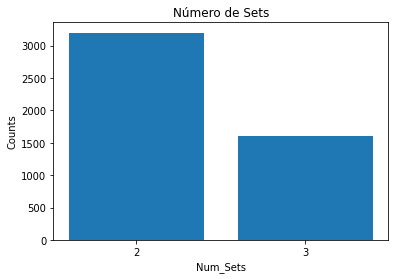

,Num_Sets,Counts
0,2,3199
1,3,1606


In [9]:
sets_count = df.groupby('Num_Sets').size().reset_index(name='Counts')
plt.bar(sets_count['Num_Sets'], sets_count['Counts'])

#for i in range(len(df)):
    #plt.text(sets_count['Num_Sets'][i], sets_count['Counts'][i], str(sets_count['Counts'][i]), ha='center', va='bottom')
plt.xlabel('Num_Sets')
plt.xticks(range(2, 4, 1))
plt.ylabel('Counts')
plt.title('Número de Sets')
plt.show()

sets_count

In [10]:
df['Num_Sets'].unique()

array([2, 3], dtype=int64)

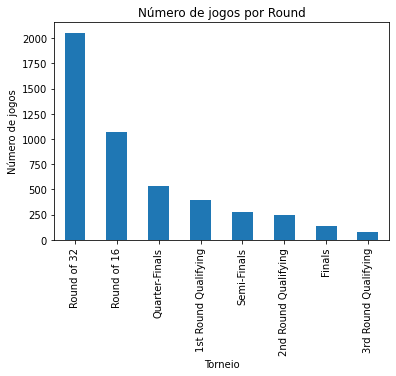

GameRound
Round of 32             2053
Round of 16             1070
Quarter-Finals           538
1st Round Qualifying     397
Semi-Finals              278
2nd Round Qualifying     252
Finals                   138
3rd Round Qualifying      79
Name: count, dtype: int64

In [11]:
counts = df['GameRound'].value_counts()

# Cria um gráfico de barras
counts.plot(kind='bar')

# Adiciona rótulos aos eixos e um título ao gráfico
plt.xlabel('Torneio')
plt.ylabel('Número de jogos')
plt.title('Número de jogos por Round')

# Mostra o gráfico na tela
plt.show()

counts

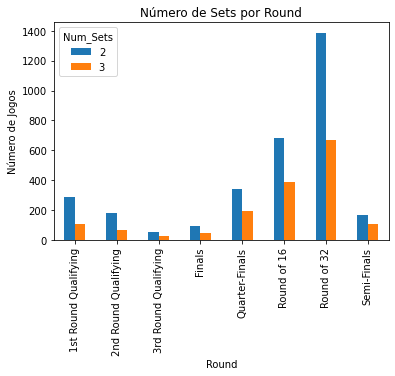

GameRound
1st Round Qualifying    2
2nd Round Qualifying    2
3rd Round Qualifying    2
Finals                  2
Quarter-Finals          2
Round of 16             2
Round of 32             2
Semi-Finals             2
dtype: int64

In [12]:
import matplotlib.pyplot as plt

# Contagem dos tipos de sets por round
counts = df.groupby('GameRound')['Num_Sets'].value_counts().unstack().fillna(0)

# Cria um gráfico de barras
counts.plot(kind='bar')

# Adiciona rótulos aos eixos e um título ao gráfico
plt.xlabel('Round')
plt.ylabel('Número de Jogos')
plt.title('Número de Sets por Round')

# Mostra o gráfico na tela
plt.show()

# Verificar o tipo de set predominante por round
dominant_sets = counts.idxmax(axis=1)
dominant_sets

In [13]:
# Combina as colunas de países do Player1 e Player2
combined_countries = pd.concat([df['Player1_country'], df['Player2_country']])

# Contagem dos sets por país
counts = combined_countries.value_counts().head(5)

# Exibir os top 5 países com mais sets
print(counts)

 Switzerland    1782
 France         1103
 Germany        1092
 Italy           857
 Spain           653
Name: count, dtype: int64


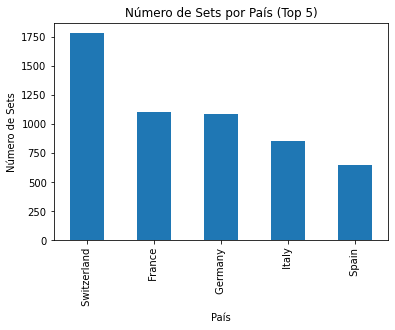

In [14]:
# Cria um gráfico de barras dos top 5 países
counts.plot(kind='bar')

# Adiciona rótulos aos eixos e um título ao gráfico
plt.xlabel('País')
plt.ylabel('Número de Sets')
plt.title('Número de Sets por País (Top 5)')

# Mostra o gráfico na tela
plt.show()

In [15]:
len(df['Player1_Name'].unique())

959

In [16]:
len(df['Player2_Name'].unique())

1372

In [105]:
df_train = pd.read_csv('df_train.csv')
df_train.drop(columns=df_train.columns[0], axis=1, inplace=True)
df_train.head()

,Num_Sets,Ground,Prize,GameRound,Tornament_Days,Rank_Diff,Height_diff,Weight_diff,Turned_pro_diff,age_diff
0,2,Hard,1308100.0,4,6,63,3,9.0,1.0,5.0
1,3,Hard,1308100.0,3,6,46,3,6.0,5.0,7.0
2,2,Hard,1225000.0,6,6,29,5,9.0,3.0,1.0
3,2,Hard,1225000.0,5,6,63,3,6.0,2.0,0.0
4,2,Hard,1225000.0,3,6,23,3,11.0,1.0,1.0


## Cramers V
### Utilização do V de Cramer para calcular a associação entre o target e as variáveis categóricas.

##### Variável Ground

In [106]:
from scipy.stats import chi2_contingency
import numpy as np

contingency_table = pd.crosstab(df_train['Ground'], df_train['Num_Sets'])


chi2, p_value, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
v_cramer = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print('Coeficiente V de Cramer:', v_cramer)
print('Valor-p:', p_value)

Coeficiente V de Cramer: 0.010733219076013514
Valor-p: 0.7582267579261459


##### Variável Gameround

In [107]:
contingency_table = pd.crosstab(df_train['GameRound'], df_train['Num_Sets'])


chi2, p_value, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
v_cramer = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print('Coeficiente V de Cramer:', v_cramer)
print('Valor-p:', p_value)

Coeficiente V de Cramer: 0.06515350277831404
Valor-p: 0.00477284484834966


## Matriz de correlação de pearson para as variáveis numéricas

In [108]:
df_train_num = df_train.drop(columns=['GameRound', 'Ground'])
df_train_num.corr(method='pearson')

,Num_Sets,Prize,Tornament_Days,Rank_Diff,Height_diff,Weight_diff,Turned_pro_diff,age_diff
Num_Sets,1.000000,0.013434,0.010231,-0.068251,0.023031,0.002371,-0.011895,-0.014872
Prize,0.013434,1.000000,-0.138727,-0.300813,-0.010333,0.073555,0.170230,0.115884
Tornament_Days,0.010231,-0.138727,1.000000,0.071443,-0.031873,-0.047928,-0.077666,-0.032890
Rank_Diff,-0.068251,-0.300813,0.071443,1.000000,0.028634,0.022642,-0.031535,0.007681
Height_diff,0.023031,-0.010333,-0.031873,0.028634,1.000000,0.356797,0.015790,0.008714
Weight_diff,0.002371,0.073555,-0.047928,0.022642,0.356797,1.000000,0.047447,0.031146
Turned_pro_diff,-0.011895,0.170230,-0.077666,-0.031535,0.015790,0.047447,1.000000,0.691187
age_diff,-0.014872,0.115884,-0.032890,0.007681,0.008714,0.031146,0.691187,1.000000


## Correlação de Spearman: Target e variáveis categóricas

Primeiro, converter Ground em uma variável categórica ordinal

In [119]:
df_train['Ground'].unique()
to_map = {'Hard': 0 , 'Carpet': 1, 'Clay': 2}

df_train_cat = df_train.copy()
df_train_cat = df_train_cat.reindex(columns=['Num_Sets', 'Ground', 'GameRound'])
df_train_cat['Ground'] = df_train_cat['Ground'].map(to_map)

df_train_cat.corr(method='spearman')

,Num_Sets,Ground,GameRound
Num_Sets,1.000000,0.002343,0.060295
Ground,0.002343,1.000000,0.043041
GameRound,0.060295,0.043041,1.000000


## Correlação de Kendall Tau

In [120]:
df_train_cat.corr(method='kendall')

,Num_Sets,Ground,GameRound
Num_Sets,1.000000,0.002232,0.054504
Ground,0.002232,1.000000,0.037173
GameRound,0.054504,0.037173,1.000000


## Scatterplot de comparação entre Turned_pro_diff e Rank_Diff 

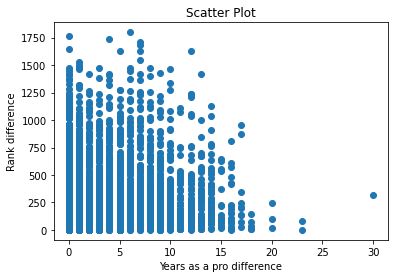

In [121]:

plt.scatter(df_train['Turned_pro_diff'], df_train['Rank_Diff'])

plt.xlabel('Years as a pro difference')
plt.ylabel('Rank difference')
plt.title('Scatter Plot')

plt.show()


In [122]:
max(df_train['Turned_pro_diff'])

30.0

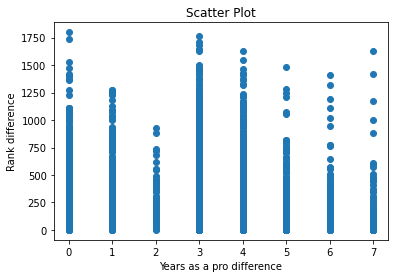

{'1st Round Qualifying': 0,
 '2nd Round Qualifying': 1,
 '3rd Round Qualifying': 2,
 'Round of 32': 3,
 'Round of 16': 4,
 'Quarter-Finals': 5,
 'Semi-Finals': 6,
 'Finals': 7}

In [123]:
to_map = {'1st Round Qualifying': 0 , "2nd Round Qualifying": 1, "3rd Round Qualifying": 2, "Round of 32": 3, "Round of 16": 4, "Quarter-Finals": 5, "Semi-Finals": 6, "Finals":7}
plt.scatter(df_train['GameRound'], df_train['Rank_Diff'])

plt.xlabel('Years as a pro difference')
plt.ylabel('Rank difference')
plt.title('Scatter Plot')

plt.show()
to_map